In [2]:
## 라이브러리 로드
import pandas as pd

In [3]:
## 1차원 데이터형인 Series를 생성
pd_series = pd.Series(
    [5000, 6000, 6500, 6500]
)

In [4]:
print(pd_series)

0    5000
1    6000
2    6500
3    6500
dtype: int64


In [5]:
pd_series2 = pd.Series(
    [5000, 6000, 6500, 6500],
    index = ['아메리카노','카페라떼','카페모카','카푸치노']
)

In [6]:
pd_series2

아메리카노    5000
카페라떼     6000
카페모카     6500
카푸치노     6500
dtype: int64

In [7]:
# Series 형태의 데이터(Class)는 내부에 적어도 2개의 변수
# values, index
print('Series의 values = ', pd_series2.values)
print('Series의 index = ', pd_series2.index)

Series의 values =  [5000 6000 6500 6500]
Series의 index =  Index(['아메리카노', '카페라떼', '카페모카', '카푸치노'], dtype='object')


In [8]:
pd_series.index = ['강희','민수','형준','민성']

In [9]:
pd_series

강희    5000
민수    6000
형준    6500
민성    6500
dtype: int64

In [10]:
values = [
    [1,2,6],
    [3,4,1],
    [6,8,3]
]
df = pd.DataFrame(values)

In [11]:
df

,0,1,2
0,1,2,6
1,3,4,1
2,6,8,3


In [12]:
## 데이터프레임에는 적어도 3개의 변수가 존재
print('데이터프레임의 values = ', df.values)
print('데이터프레임의 index = ', df.index)
print('데이터프레임의 columns = ', df.columns)

데이터프레임의 values =  [[1 2 6]
 [3 4 1]
 [6 8 3]]
데이터프레임의 index =  RangeIndex(start=0, stop=3, step=1)
데이터프레임의 columns =  RangeIndex(start=0, stop=3, step=1)


In [13]:
# 컬럼의 이름을 변경
df.columns = ['어머나','다시한번','말해봐']

In [14]:
# 특정 컬럼의 이름이나 특정 인덱스의 이름을 변경하려면
# rename()
# index 매개변수 : 딕셔너리형태 인자값을 사용 {'기준이되는 인덱스 : 변경할 인덱스 값}
# columns 매개변수 :  딕셔너리형태 인자값을 사용 { 기준이되는 컬럼 : 변경할 컬럼 값}
# inplace 매개변수 : bool형 인자값을 사용(FALSE(기본값): 데이터를 변경하지 않는다, True : 데이터를 변경하겠다.)
df.rename(
    columns = {'어머나':'A'},
    index = {0:8},
    inplace = True
)


In [15]:
df

,A,다시한번,말해봐
8,1,2,6
1,3,4,1
2,6,8,3


In [16]:
df2 = df.copy()

In [17]:
df2.rename(
    columns = {
        'A' : 'X',
        'C' : 'Y'
    },
    inplace = True
)

In [18]:
df2

,X,다시한번,말해봐
8,1,2,6
1,3,4,1
2,6,8,3


### 외부의 파일을 로드
- csv, tsv
    - read_csv(파일의 경로)
- json
    - read_json(파일의 경로)
- excel(xls, xlsx)
    - read_excel(파일의 경로)
    - 추가로 라이브러리(readxl)를 설치해야되는 상황
- xml
    - read_xml(파일의 경로)
- html
    - read_html(html로 이루어진 문자형 데이터)
    - 웹 구조 중 table로 이루어진 태그를 DataFrame 변경
- 매개변수
    - encoding
        - 데이터 중 한글이 존재할 때 encoding error가 발생 할 수 있다.
        - 기본 encoding은 UTF-8
        - CP949, EUC-KR 형태로 변경하면 한글 데이터 로드

In [19]:
## 외부의 csv파일 로드
## 절대 경로 파일 로드(환경이 변할때 파일의 위치를 찾지 못할 경우가 생긴다.)
corona = pd.read_csv('/Users/kang_hiee/Documents/GitHub/ubion/python/csv/corona.csv')

In [20]:
# 상대 경로 파일 로드
# 상위로 이동(,,/)
corona2 = pd.read_csv('../csv/corona.csv')

In [21]:
## 데이터가 한글인 경우
## encoding을 cp949 or euc-kr 로 변경
df = pd.read_csv('../csv/주민등록.csv', encoding='cp949')

In [22]:
df.head()

,자치구코드(atdrc_code_se),자치구명(atdrc_nm),년월(년월),총인구수(tot_popltn_co),세대수(tot_hshld_co),세대당인구(hshld_popltn_avrg_co),남자인구수(male_popltn_co),여자인구수(female_popltn_co),적재일시(ldadng_dt)
0,금천구,11110,201907,228755,171426,2.44,319062,118352,2018-01-05 16:52:25
1,서대문구,11290,201607,153780,186744,2.12,75614,116393,2018-12-05 10:20:57
2,양천구,11740,201804,594315,61091,2.22,192817,307237,2020-11-03 10:50:11
3,은평구,11200,202004,345156,168865,2.13,229690,204108,2018-01-05 16:52:25
4,마포구,11260,201902,394788,168482,2.52,61714,146951,2018-01-05 16:52:25


In [23]:
## 엑셀 파일을 로드
## 추가적인 라이브러리 설치가 필요한 경우도 존재
#pd.read_excel('../csv/2020/202001_expense_list.xlsx').head(2)

In [24]:
corona.head()

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [25]:
## 특정 컬럼을 제거
## drop() : 특정 인덱스나 특정 컬럼을 제거할때 사용 
## axis 매개변수 : 0(rows) -> 특정행을제거, 1(columns)- > 특정 열을 제거
corona = corona.drop('Unnamed: 0',axis=1)



## 컬럼들의 이름을 출력
corona.columns

Index(['createDt', 'deathCnt', 'decideCnt', 'seq', 'stateDt', 'stateTime',
       'updateDt', 'accExamCnt', 'accDefRate'],
      dtype='object')

In [26]:
## 데이터프레임에서 상위 5개의 데이터를 출력
## head(2) -> 상위 2개의 데이터를 출력
## tail() -> 하위 5개의 데이터를 출력
corona.head(5)


,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [27]:
# 데이터프레임의 정보를 출력
# info()
corona.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   createDt    820 non-null    object 
 1   deathCnt    820 non-null    int64  
 2   decideCnt   820 non-null    int64  
 3   seq         820 non-null    int64  
 4   stateDt     820 non-null    int64  
 5   stateTime   820 non-null    object 
 6   updateDt    817 non-null    object 
 7   accExamCnt  692 non-null    float64
 8   accDefRate  623 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 57.8+ KB


In [28]:
# isna() : 결측치의 유무를 참/거짓의 형태로 출력
# sum()
    # DataFrame Class에 내장된 함수
    # axis 매개변수 : 0(rows) -> 행의 값들의 합, 1(columns) -> 열의 값들의 합
corona.isna().sum(axis=0)


createDt        0
deathCnt        0
decideCnt       0
seq             0
stateDt         0
stateTime       0
updateDt        3
accExamCnt    128
accDefRate    197
dtype: int64

In [29]:
# 통계요약 정보를 출력하는 함수
corona.describe()

,deathCnt,decideCnt,seq,stateDt,accExamCnt,accDefRate
count,820.000000,8.200000e+02,820.000000,8.200000e+02,6.920000e+02,623.000000
mean,3927.832927,1.913097e+06,472.393902,2.020897e+07,7.545057e+06,1.556435
std,6164.310693,4.857030e+06,249.701095,7.118265e+03,6.172020e+06,0.543014
min,54.000000,7.513000e+03,51.000000,2.020031e+07,2.101440e+05,0.902205
25%,415.750000,2.393525e+04,256.750000,2.020100e+07,1.934309e+06,1.078089
50%,1812.500000,1.185640e+05,461.500000,2.021042e+07,6.368310e+06,1.416159
75%,3120.500000,3.979915e+05,698.250000,2.021112e+07,1.216890e+07,1.816009
max,24305.000000,1.818820e+07,904.000000,2.022061e+07,2.151807e+07,3.919308


In [30]:
## 데이터프레임에서 컬럼의 이름을 변경
## '등록일시', '총사망자', '총확진자', '게시글번호'
## '기준일', '기준시간', '수정일시', '누적의심자', '누적확진율'

# case1 (rename())
corona.rename(
    columns =  {
        'createDt' : '등록일시',
        'deathCnt' : '총사망자',
        'decideCnt' : ' 총확진자',
        'seq' : '게시글번호',
        'stateDt' : '기준일',
        'stateTime' : '기준시간',
        'updateDt' : '수정일시',
        'accExamCnt' : '누적의심자',
        'accDefRate' : '누적확진율'
    }
)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율
0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN
...,...,...,...,...,...,...,...,...,...
815,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000
816,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
817,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
818,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175


In [31]:
# case2 (DataFrame 안에 있는 columns라는 변수의 데이터를 변경)
corona.columns = ['등록일시', '총사망자', '총확진자', '게시글번호', '기준일', '기준시간', '수정일시', '누적의심자', '누적확진율']

In [32]:
corona.head()

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율
0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [33]:
## 데이터프레임에서 인덱스의 순서를 변경
## sort_index() : 인덱스를 기준으로 정렬을 변경
## sort_values() : 컬럼의 데이터를 기준으로 정렬을 변경
## sort_xxx() : 기본적으로 오름차순 정렬
## ascending 매개변수 : True(기본값) -> 오름차순정렬, False -> 내림차순정렬 

# 강희
#corona.sort_values(by = '기준일', ascending = True)

#교수님
#['등록일시']처럼 리스트로 쓰는 이유는 정렬 기준 컬럼이 여러개일수도 있기 떄문이다.!!!
corona.sort_values(
    ['등록일시'],
    ascending = True,
    inplace=True
)

In [34]:
corona

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율
819,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
818,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
817,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
816,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
815,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000
...,...,...,...,...,...,...,...,...,...
4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN
3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN


In [35]:
## 인덱스를 초기화 할거다
# reset_index()
# drop 매개변수 : False(기본값) -> 기존의 인덱스를 컬럼을 이동, 
              # True : 기존의 인덱스를 제거 
corona.reset_index(drop=True, inplace=True)

In [36]:
#corona['기준일'].nunique()
corona['기준일'].duplicated().sum()

0

In [37]:
len(corona)

820

### 데이터프레임의 필터링
- loc[ 인덱스의 조건식, 컬럼의 조건식 ] 
    - 인덱스의 값이나 컬럼의 값을 기준으로 필터링 (df.loc[1, 'A'])
    - 인덱스의 조건식이나 컬럼의 조건식 기준으로 필터링 
- iloc[ 인덱스의 위치, 컬럼의 위치 ]
    - 인덱스의 위치, 컬럼의 위치를 기준으로 필터링 (df.iloc[2:4, :2])
        

In [38]:
# 인덱스 0의 컬럼은 총 사망자의 데이터를 출력
corona.loc[0, '총사망자']

54

In [39]:
# 인덱스 1의 컬럼은 총 사망자의 데이터를 출력
corona.loc[1, '총사망자']

60

In [40]:
coronang = corona.copy()

In [41]:
# 일일사망자 컬럼 생성 및 일일사망자 값 채우기
coronang['일일사망자'] = ''

for i in range(1, len(coronang)):
    coronang['일일사망자'][i] = coronang.loc[i, '총사망자'] - coronang.loc[i-1, '총사망자']

/var/folders/j6/txnqzgpx1wx4nmdw439z1jn80000gn/T/ipykernel_1109/2221760548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coronang['일일사망자'][i] = coronang.loc[i, '총사망자'] - coronang.loc[i-1, '총사망자']


In [42]:
coronang.head()

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,1
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,5


In [43]:
## shift(n) : 인덱스를 n만큼 이동 시킨다
corona['총사망자'].shift(1)

0          NaN
1         54.0
2         60.0
3         66.0
4         67.0
        ...   
815    24229.0
816    24238.0
817    24258.0
818    24279.0
819    24299.0
Name: 총사망자, Length: 820, dtype: float64

In [44]:
corona['총사망자'].values

array([   54,    60,    66,    67,    72,    75,    75,    81,    84,
          91,    94,   102,   104,   111,   120,   126,   131,   139,
         144,   152,   158,   162,   165,   169,   174,   177,   183,
         186,   192,   200,   204,   208,   211,   214,   217,   222,
         225,   229,   230,   232,   234,   236,   237,   238,   240,
         240,   240,   242,   243,   244,   246,   247,   248,   250,
         250,   252,   254,   255,   256,   256,   256,   256,   256,
         258,   259,   260,   262,   262,   263,   263,   263,   264,
         264,   266,   266,   267,   269,   269,   269,   269,   269,
         270,   271,   272,   273,   273,   273,   273,   273,   273,
         274,   276,   276,   277,   277,   277,   277,   278,   279,
         280,   280,   280,   280,   280,   281,   281,   282,   282,
         282,   282,   282,   282,   282,   282,   282,   283,   283,
         284,   285,   285,   287,   288,   288,   289,   289,   289,
         289,   291,

In [45]:
import numpy as np

In [46]:
list1 = [1,2,3,4]
list2 = [5,6,7,8]

In [47]:
list3 = np.array(list1)
list4 = np.array(list2)

In [48]:
list3+list4

array([ 6,  8, 10, 12])

In [49]:

coronang['일일사망자2'] = corona['총사망자'] - corona['총사망자'].shift(1)

In [50]:
coronang.head(1)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일사망자2
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,,NaN


In [51]:
# diff(n): 인덱스를 n만큼 이동한 데이터와의 차이값을 출력
coronang['일일사망자3'] =coronang['총사망자'].diff(1)

In [53]:
corona

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000
...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN


In [52]:
#corona  = corona.drop('일일사망자2', axis=1)

KeyError: "['일일사망자2'] not found in axis"

In [54]:
## 결측치를 특정한 값을 대체
## 채운다(fill) + 결측치(na) -> fillna()
## fillna(data) : 결측치를 data로 치환
## fillna(method = ) : method 매개변수 -> 'ffill' : 전의 데이터로 치환
#                                       'bfill' : 후의 데이터로 치환

values = [
    [1,2,3],
    [5,np.nan,np.nan],
    [np.nan,8,9]
]

df = pd.DataFrame(values, columns = ['A','B','C'])

In [55]:
# 이전값으로 NA값 대체
df['B'] = df['B'].fillna(method = 'ffill')

In [56]:
df

,A,B,C
0,1.0,2.0,3.0
1,5.0,2.0,NaN
2,NaN,8.0,9.0


In [57]:
# 이후값으로 NA값 대체
df['C'] = df['C'].fillna(method = 'bfill')

In [58]:
df

,A,B,C
0,1.0,2.0,3.0
1,5.0,2.0,9.0
2,NaN,8.0,9.0


In [59]:
df.fillna(method='ffill')

,A,B,C
0,1.0,2.0,3.0
1,5.0,2.0,9.0
2,5.0,8.0,9.0


In [60]:
df.fillna(0)

,A,B,C
0,1.0,2.0,3.0
1,5.0,2.0,9.0
2,0.0,8.0,9.0


In [61]:
coronang['일일사망자'][0] = np.nan

/var/folders/j6/txnqzgpx1wx4nmdw439z1jn80000gn/T/ipykernel_1109/2618869377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coronang['일일사망자'][0] = np.nan


In [62]:
## coronang 데이터에서 일일사망자2, 일일사망자3에 결측치를 0으로 대체
coronang[['일일사망자','일일사망자2','일일사망자3']] = \
    coronang[['일일사망자','일일사망자2','일일사망자3']].fillna(0)

In [63]:
coronang.head(3)

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일사망자2,일일사망자3
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6,6.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6,6.0,6.0


In [64]:
coronang.describe()

,총사망자,총확진자,게시글번호,기준일,누적의심자,누적확진율,일일사망자,일일사망자2,일일사망자3
count,820.000000,8.200000e+02,820.000000,8.200000e+02,6.920000e+02,623.000000,820.000000,820.000000,820.000000
mean,3927.832927,1.913097e+06,472.393902,2.020897e+07,7.545057e+06,1.556435,29.574390,29.574390,29.574390
std,6164.310693,4.857030e+06,249.701095,7.118265e+03,6.172020e+06,0.543014,68.530863,68.530863,68.530863
min,54.000000,7.513000e+03,51.000000,2.020031e+07,2.101440e+05,0.902205,-2.000000,-2.000000,-2.000000
25%,415.750000,2.393525e+04,256.750000,2.020100e+07,1.934309e+06,1.078089,2.000000,2.000000,2.000000
50%,1812.500000,1.185640e+05,461.500000,2.021042e+07,6.368310e+06,1.416159,5.000000,5.000000,5.000000
75%,3120.500000,3.979915e+05,698.250000,2.021112e+07,1.216890e+07,1.816009,20.000000,20.000000,20.000000
max,24305.000000,1.818820e+07,904.000000,2.022061e+07,2.151807e+07,3.919308,469.000000,469.000000,469.000000


In [65]:
coronang.loc[coronang['일일사망자2'] < 0].index
coronang.iloc[440:450,]

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일사망자2,일일사망자3
440,2021-05-25 00:00:00.000,1938,136973,492,20210525,00:00,2021-10-07 10:30:51.51,9592726.0,1.445530,4,4.0,4.0
441,2021-05-26 00:00:00.000,1940,137678,493,20210526,00:00,2021-10-07 10:30:51.51,9629455.0,1.447964,2,2.0,2.0
442,2021-05-27 00:00:00.000,1943,138307,494,20210527,00:00,2021-10-07 10:30:51.51,9665690.0,1.449298,3,3.0,3.0
443,2021-05-28 00:00:00.000,1946,138894,495,20210528,00:00,2021-10-07 10:30:51.51,9702453.0,1.449896,3,3.0,3.0
444,2021-05-29 00:00:00.000,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,5,5.0,5.0
445,2021-05-30 00:00:00.0,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,8,8.0,8.0
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-2,-2.0,-2.0
447,2021-06-01 00:00:00.000,1963,140796,499,20210601,00:00,2021-10-07 10:30:51.51,9798400.0,1.455890,6,6.0,6.0
448,2021-06-02 00:00:00.000,1965,141473,500,20210602,00:00,2021-10-07 10:30:51.51,9834348.0,1.457668,2,2.0,2.0
449,2021-06-03 00:00:00.000,1968,142154,501,20210603,00:00,2021-10-07 10:30:51.51,9872322.0,1.459112,3,3.0,3.0


In [66]:
# 인덱스 445에 등록일시의 데이터를 수정
coronang.loc[445, '등록일시'] = '2021-05-31 00:00:00.000'

In [67]:
coronang.loc[444:446]

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일사망자2,일일사망자3
444,2021-05-29 00:00:00.000,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,5,5.0,5.0
445,2021-05-31 00:00:00.000,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,8,8.0,8.0
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-2,-2.0,-2.0


1. 일일사망자, 일일사망자2, 일일사망자3 컬럼을 제거
2. 등록일시를 기준으로 오름차순 정렬
3. 인덱스를 초기화
4. shift() 함수를 이용하여 일일사망자 파생변수 생성
5. diff() 함수를 이용하여 일일확진자 파생변수 생성
6. 일일사망자와 일일 확진자의 음수가 존재하는지 확인

In [68]:
# 1. 일일사망자, 일일사망자2, 일일사망자3 컬럼을 제거
coronang = coronang.drop(['일일사망자','일일사망자2','일일사망자3'], axis=1)

In [69]:
# 2. 등록일시를 기준으로 오름차순 정렬
coronang.sort_values(by = '등록일시', ascending=True, inplace=True)

In [70]:
# 3. 인덱스를 초기화
coronang.reset_index(drop = True, inplace=True)

In [76]:
# 4. shift() 함수를 이용하여 일일사망자 파생변수 생성
coronang['일일사망자'] = (coronang['총사망자'] - coronang['총사망자'].shift(1)).fillna(0)

In [77]:
# 5. diff() 함수를 이용하여 일일확진자 파생변수 생성
coronang['일일확진자'] = (coronang['총확진자'].diff(1)).fillna(0)

In [78]:
# 6. 일일사망자와 일일 확진자의 음수가 존재하는지 확인
print(coronang[['일일사망자','일일확진자']].describe())
coronang.loc[(coronang['일일사망자']<0)|(coronang['일일확진자']<0)]

            일일사망자          일일확진자
count  820.000000     820.000000
mean    29.574390   22171.569512
std     68.530435   71013.844067
min      0.000000       0.000000
25%      2.000000     125.000000
50%      5.000000     634.000000
75%     20.000000    2782.750000
max    469.000000  621204.000000


,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일확진자


<AxesSubplot:>

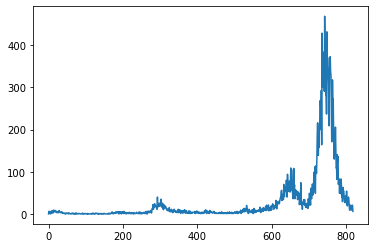

In [79]:
## 일일사망자를 기준으로 하여 라인 그래프 생성
coronang['일일사망자'].plot()

In [83]:
coronang.loc[(coronang[['일일사망자','일일확진자']]<0).any(axis=1)]

,등록일시,총사망자,총확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진율,일일사망자,일일확진자
